# PDE-FIND for the Kuramoto Sivashinsky Equation

Samuel Rudy, 2016

This notebook demonstrates PDE-FIND on the Kuramoto Sivashinsky equation.
$$
u_t + u_{xxxx} + uu_x + u_{xx} = 0
$$

In [88]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# from PDE_FIND import *
import scipy.io as sio
from scipy.integrate import odeint
from numpy.fft import fft,ifft,fftfreq

Populating the interactive namespace from numpy and matplotlib


/root/miniconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['std', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [89]:
# data = sio.loadmat('./canonicalPDEs/kuramoto_sivishinky.mat')
data = sio.loadmat('./kuramoto_sivishinky.mat')
u = data['uu']
x = data['x'][:,0]
t = data['tt'][0,:]
dt = t[1]-t[0]
dx = x[2]-x[1]

n = len(x)
m = len(t)

In [90]:
# X, T = np.meshgrid(x, t)
# fig1 = figure()
# # ax = fig1.gca(projection='3d')
# ax = fig1.add_subplot(projection='3d')
# surf = ax.plot_surface(X, T, u.T, rstride=1, cstride=1, cmap=cm.coolwarm,
#     linewidth=0, antialiased=False)
# title('Kuramoto Sivashinsky Equation', fontsize = 20)
# xlabel('x', fontsize = 16)
# ylabel('t', fontsize = 16)

In [91]:
# print(u.T.shape)
# print(u.T.reshape(1,4001, 512).shape)

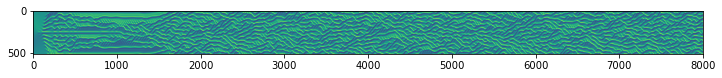

In [92]:
plt.imshow(u)

In [93]:
4000/16

250.0

In [108]:
n_modes, n_timesteps = u.shape
n = 100
step_max = 216 + 2
n_steps = 5

data = np.zeros((n, step_max * n_steps, n_modes))
print(data.shape)

spot = 0
# for i in np.linspace(2000, n_timesteps-step_max * n_steps, n, dtype=int):
for i in (np.linspace(2000, n_timesteps-step_max * n_steps-30, n, dtype=int) + np.random.normal(0,10, (n,))).astype(int):
    data[spot] = u[:,i: (i + step_max * n_steps)].T
    spot += 1

(100, 1090, 512)


In [109]:
n_timesteps

8001

In [110]:
np.linspace(2000, n_timesteps-step_max * n_steps-30, n, dtype=int)

array([2000, 2049, 2098, 2147, 2197, 2246, 2295, 2345, 2394, 2443, 2493,
       2542, 2591, 2640, 2690, 2739, 2788, 2838, 2887, 2936, 2986, 3035,
       3084, 3133, 3183, 3232, 3281, 3331, 3380, 3429, 3479, 3528, 3577,
       3627, 3676, 3725, 3774, 3824, 3873, 3922, 3972, 4021, 4070, 4120,
       4169, 4218, 4267, 4317, 4366, 4415, 4465, 4514, 4563, 4613, 4662,
       4711, 4760, 4810, 4859, 4908, 4958, 5007, 5056, 5106, 5155, 5204,
       5254, 5303, 5352, 5401, 5451, 5500, 5549, 5599, 5648, 5697, 5747,
       5796, 5845, 5894, 5944, 5993, 6042, 6092, 6141, 6190, 6240, 6289,
       6338, 6387, 6437, 6486, 6535, 6585, 6634, 6683, 6733, 6782, 6831,
       6881])

In [95]:
(np.linspace(2000, n_timesteps-step_max * n_steps-30, n, dtype=int) + np.random.normal(0,10, (n,))).astype(int)

array([2012, 2026, 2043, 2039, 2075, 2059, 2070, 2083, 2097, 2119, 2108,
       2115, 2127, 2134, 2149, 2175, 2176, 2213, 2207, 2211, 2244, 2243,
       2256, 2264, 2284, 2281, 2319, 2301, 2313, 2357, 2341, 2350, 2368,
       2389, 2403, 2407, 2438, 2427, 2454, 2459, 2454, 2475, 2488, 2511,
       2502, 2527, 2534, 2550, 2565, 2559, 2572, 2580, 2603, 2602, 2634,
       2612, 2665, 2660, 2663, 2686, 2711, 2711, 2713, 2728, 2731, 2754,
       2764, 2775, 2779, 2806, 2807, 2830, 2836, 2844, 2872, 2865, 2868,
       2899, 2906, 2913, 2915, 2935, 2953, 2960, 2952, 2976, 2993, 2999,
       3011, 3028, 3031, 3060, 3076, 3087, 3096, 3103, 3115, 3126, 3122,
       3147, 3175, 3151, 3190, 3186, 3213, 3219, 3230, 3238, 3254, 3252,
       3282, 3280, 3313, 3309, 3324, 3321, 3343, 3352, 3383, 3381, 3383,
       3390, 3411, 3410, 3435, 3451, 3464, 3480, 3512, 3503, 3495, 3536,
       3529, 3537, 3546, 3567, 3586, 3582, 3594, 3615, 3621, 3623, 3647,
       3683, 3659, 3686, 3699, 3698, 3698, 3719, 37

In [111]:
noise = 0.0
std =  np.std(data)
print(std)
print(np.min(data))
print(np.max(data))
data_noise = data + np.random.normal(0,std*noise, data.shape)

np.save("train_long_noise{}.npy".format(noise), data)

1.310924125753576
-3.487823867354351
3.3678349564033367


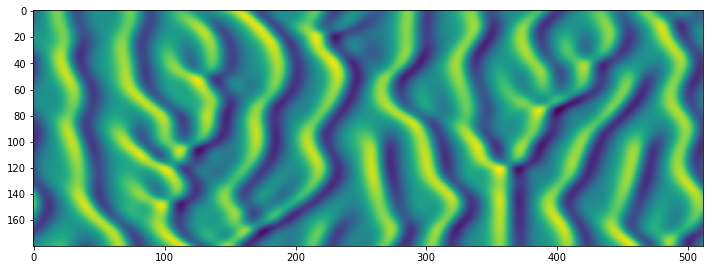

In [97]:
# plt.imshow(data_noise[0])
# # plt.colorbar()
# plt.show()
plt.imshow(data[0])
# plt.colorbar()
plt.show()

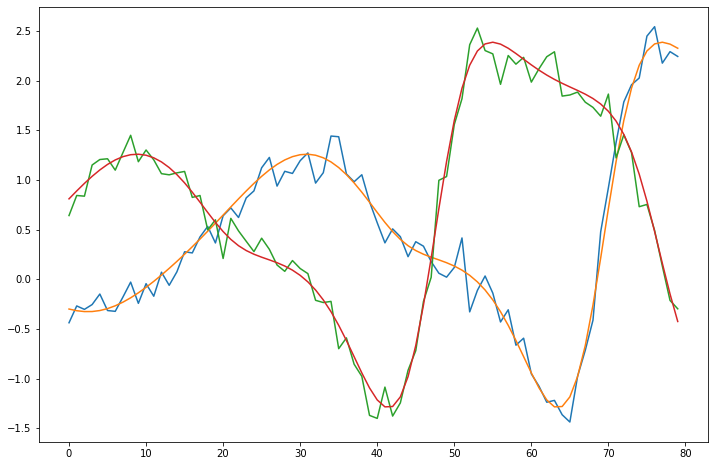

In [65]:
plt.plot(data_noise[0,:,100])
plt.plot(data[0,:,100])

plt.plot(data_noise[1,:,100])
plt.plot(data[1,:,100])

In [87]:
np.save("train_noise0.0.npy", data)

In [28]:
np.linspace(2000, n_timesteps-step_max * n_steps, n, dtype=int).shape

(500,)

In [38]:
print((np.linspace(2000, n_timesteps-step_max * n_steps, n, dtype=int) + np.random.normal(0,10, (500,))).astype(int))

[2006 2012 2014 2023 2044 2053 2090 2077 2096 2097 2124 2129 2136 2155
 2158 2185 2177 2223 2208 2228 2243 2260 2262 2274 2276 2294 2317 2309
 2348 2334 2367 2363 2386 2394 2404 2416 2429 2442 2453 2469 2459 2502
 2486 2515 2514 2536 2548 2559 2562 2577 2595 2612 2623 2636 2651 2651
 2676 2659 2702 2686 2702 2712 2735 2765 2765 2776 2768 2790 2811 2841
 2841 2818 2834 2859 2875 2901 2907 2930 2925 2944 2954 2942 2983 2985
 2991 3032 3011 3034 3044 3056 3062 3081 3107 3098 3101 3121 3132 3153
 3158 3193 3186 3197 3207 3230 3240 3249 3244 3261 3281 3276 3305 3309
 3323 3337 3332 3353 3391 3378 3387 3414 3413 3425 3449 3451 3469 3482
 3498 3526 3510 3541 3546 3558 3573 3576 3584 3594 3598 3618 3636 3645
 3656 3679 3675 3681 3701 3719 3721 3748 3755 3778 3769 3813 3805 3832
 3818 3847 3851 3839 3859 3878 3904 3891 3917 3929 3954 3963 3956 3968
 3988 4017 4013 4043 4039 4056 4074 4076 4086 4101 4111 4115 4123 4143
 4161 4164 4186 4186 4200 4228 4218 4233 4253 4286 4277 4272 4294 4307
 4323 

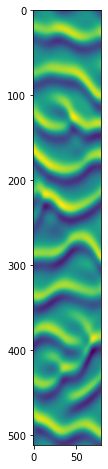

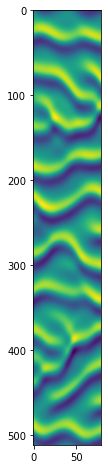

In [41]:
plt.imshow(data[0].T)
plt.show()
plt.imshow(data[1].T)
plt.show()

1.2713578762808202


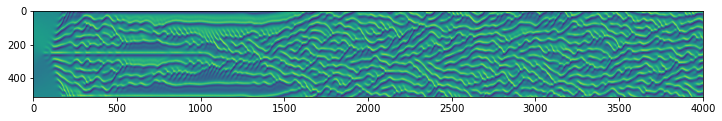

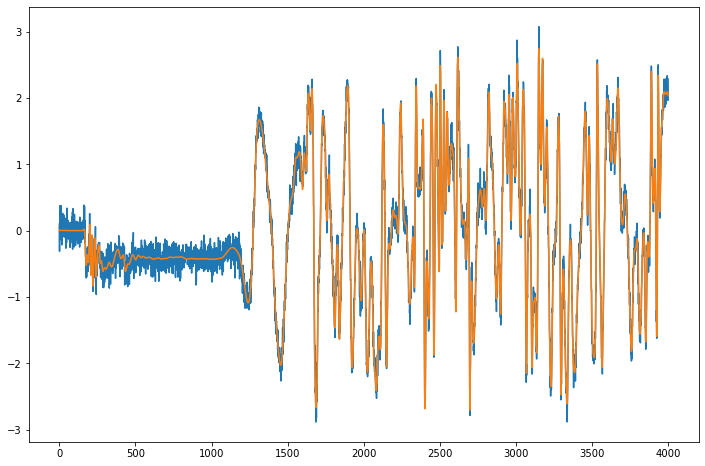

In [8]:
std = np.std(u)
print(std)
u_1 = u + np.random.normal(0, 0.1*std, u.shape)
plt.imshow(u_1)
plt.show()
plt.plot(u_1[0])
plt.plot(u[0])

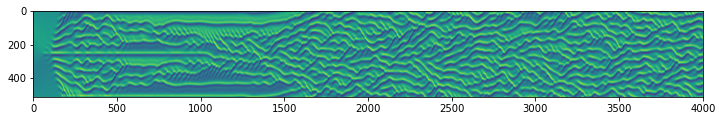

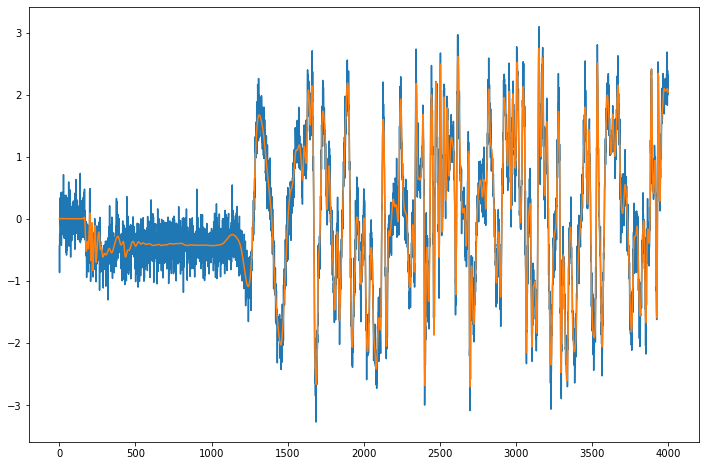

In [9]:
noise_level = 0.2
u_1 = u + np.random.normal(0, noise_level*std, u.shape)
plt.imshow(u_1)
plt.show()
plt.plot(u_1[0])
plt.plot(u[0])
np.save('train_noise{}.npy'.format(noise_level), u_1.T.reshape(1,4001, 512))

## Construct $\Theta (U)$ and compute $U_t$

The function build_linear_system does this for us.  We specify <br>
D = highest derivative to appear in $\Theta$  <br>
P = highest degree polynomial of $u$ to appear in $\Theta$ (not including multiplication by a derivative.  <br>
time_diff and space_diff taken via finite differences

Printed out is a list of candidate functions for the PDE.  Each is a column of $\Theta (U)$

In [10]:
Ut, R, rhs_des = build_linear_system(u, dt, dx, D=5, P=5, time_diff = 'FD', space_diff = 'FD')

NameError: name 'build_linear_system' is not defined

In [ ]:
['1']+rhs_des[1:]

## Solve for $\xi$

TrainSTRidge splits the data up into 80% for training and 20% for validation.  It searches over various tolerances in the STRidge algorithm and finds the one with the best performance on the validation set, including an $\ell^0$ penalty for $\xi$ in the loss function.

In [ ]:
w = TrainSTRidge(R,Ut,10**-5,5)
print "PDE derived using STRidge"
print_pde(w, rhs_des)

In [ ]:
err = abs(np.array([(1-0.984425)*100/0.5, (1-0.994175)*100, (1-0.998730)*100]))
print mean(err)
print std(err)

In [ ]:
def TrainSTRidge_2(A, b, num_tols = 50, lam = 1e-5, normalize = 2, STR_iters = 10, l0_penalty = None, split = 0.8):
    """
    Searches over values of tol to find optimal performance.
    Solves Ax=b with sparse x
    """

    # Split data into 80% training and 20% test, then search for the best tolderance.
    np.random.seed(0) # for consistancy
    N,D = A.shape
    train = np.random.choice(N, int(N*split), replace = False)
    test = [i for i in np.arange(N) if i not in train]
    A_train = A[train,:]
    A_test = A[test,:]
    b_train = b[train,:]
    b_test = b[test,:]

    if l0_penalty == None: l0_penalty = 0.001*np.linalg.cond(A_train)

    # First normalize data
    if normalize != 0:

        A_norm = np.zeros_like(A_train)
        Mreg = np.zeros((D,1))

        for i in range(0,D):
            Mreg[i] = 1/(np.linalg.norm(A_train[:,i],normalize))
            A_norm[:,i] = A_train[:,i]*Mreg[i]

    else: A_norm = A_train
    
    # Get array of tols to check
    x_ridge = Ridge(A_norm,b_train,lam)
    max_tol = np.max(abs(x_ridge))
    min_tol = np.min(abs(x_ridge))
    Tol = [0]+[np.exp(alpha) for alpha in np.linspace(np.log(min_tol), np.log(max_tol), num_tols)][:-1]

    # Test each value of tol to find the best
    X = []
    Losses = []

    for tol in Tol:
        # x = STRidge(A_norm,b_train,tol)
        x = STRidge(A_norm,b_train,lam,STR_iters,tol,normalize=0)

        if normalize!= 0:
            x =  np.multiply(Mreg,x)

        X.append(x)
        Losses.append(np.linalg.norm(b_test - A_test.dot(x), 2)**2 + l0_penalty*np.count_nonzero(x))
            
    return X,Tol,Losses

In [ ]:
C,Tol,Losses = TrainSTRidge_2(R,Ut)
c = C[np.argmin(Losses)]
print_pde(c, rhs_des)

## Now identify the same dynamics but with added noise.

The only difference from above is that finite differences work poorly for noisy data so here we use polynomial interpolation.  With deg_x or deg_t and width_x or width_t we specify the degree number of points used to fit the polynomials used for differentiating x or t.  Unfortunately, the result can be sensitive to these.

In [ ]:
numpy.random.seed(0)
un = u + 0.01*std(u)*np.random.randn(u.shape[0],u.shape[1])

In [ ]:
Utn, Rn, rhs_des = build_linear_system(un, dt, dx, D=5, P=5, width_x = 100, width_t = 30, deg_x = 30, deg_t = 20)
w = TrainSTRidge(Rn,Utn,10**-3,5)
print "PDE derived using STRidge"
print_pde(w, rhs_des)

In [ ]:
C,Tol,Losses = TrainSTRidge_2(Rn,Utn)
c = C[np.argmin(Losses)]
print_pde(c, rhs_des)

In [ ]:
C,Tol,Losses = TrainSTRidge_2(Rn,Utn,lam=10**-3)
c = C[np.argmin(Losses)]
print_pde(c, rhs_des)

In [ ]:
print_pde(C[35], rhs_des)

In [ ]:
Utn, Rn, rhs_des = build_linear_system(un, dt, dx, D=5, P=5, width_x = 100, width_t = 30, deg_x = 20, deg_t = 10)
w = TrainSTRidge(Rn,Utn,10**-3,5)
print "PDE derived using STRidge"
print_pde(w, rhs_des)

In [ ]:
Utn, Rn, rhs_des = build_linear_system(un, dt, dx, D=5, P=5, width_x = 100, width_t = 30, deg_x = 30, deg_t = 50)
w = TrainSTRidge(Rn,Utn,10**-3,5)
print "PDE derived using STRidge"
print_pde(w, rhs_des)

In [ ]:
C,Tol,Losses = TrainSTRidge_2(Rn,Utn,lam=10**-3)
c = C[np.argmin(Losses)]
print_pde(c, rhs_des)

In [ ]:
err = abs(np.array([(1-0.458521)*100, (1-0.480667)*100, (1-0.492282)*100]))
print mean(err)
print std(err)

## Try Integrating Learned PDE

In [ ]:
def ks_rhs(u, t, params):
    n, k, a, b, c = params
    deriv = a*u*ifft(1j*k*fft(u)) + b*ifft(-k**2*fft(u)) + c*ifft(k**4*fft(u))
    return real(deriv)

k = 2*np.pi*fftfreq(n, d = dx)

# Coefficients learned from clean data
a = -0.984425     # uu_x
b = -0.994175     # u_{xx}
c = -0.998730     # u_{xxxx}

# Coefficients learned from noisy data
an = -0.504533     # uu_x
bn = -0.530002     # u_{xx}
cn = -0.540312     # u_{xxxx}

params = (n, k, a, b, c)
params_n = (n, k, an, bn, cn)

u0 = u[:,0]
u2 = odeint(ks_rhs, u0, t, args=(params,))
u2n = odeint(ks_rhs, u0, t, args=(params_n,))

In [ ]:
X, T = np.meshgrid(x, t)
fig1 = figure()
ax = fig1.gca(projection='3d')
surf = ax.plot_surface(X, T, u2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
title('Identified Dynamics: Clean Data', fontsize = 20)
xlabel('x', fontsize = 16)
ylabel('t', fontsize = 16)

In [ ]:
X, T = np.meshgrid(x, t)
fig1 = figure()
ax = fig1.gca(projection='3d')
surf = ax.plot_surface(X, T, u2n, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
title('Identified Dynamics: Noisy Data', fontsize = 20)
xlabel('x', fontsize = 16)
ylabel('t', fontsize = 16)